# Description

We have data related to company reviews, obtained from various job portals. There are 3 companies for which we have reviews data, namely -
1. Anglo American
2. Glencore
3. Rio Tinto

Following are the tasks to be performed on the given dataset-
1. Plotting word cloud - Plotting word cloud which shows the most frequent word used in the company review data.

2. Sentiment Analysis - Sentiment analysis on each review, based on location and year.

3. Topic Modelling - Topic modelling on all the three datasets.

Follwing are the steps carried out for the completion of above tasks-
1. Cleaning the location data
2. Removing special characters
3. converting words to lower case
4. Removing stop words
5. Plotting word cloud
6. Sentiment Analysis location and region wise
7. Topic Modelling

# Importing modules

In [29]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
from gensim import corpora

%matplotlib inline

# Importing the data

In [201]:
# Importing the required data

anglo_american = pd.read_csv("Anglo_American_review_Eng.csv", encoding="ISO-8859-1")
glencore = pd.read_csv("Glencore_review_Eng.csv", encoding="ISO-8859-1")
rio_tinto = pd.read_csv("Rio_Tinto_review_Eng.csv", encoding="ISO-8859-1")
location_data = pd.read_csv("AAlocation Standadize.csv", encoding="ISO-8859-1")

# Cleaning the location data

The location data contains many special characters, and different abbrevations to denote the same location, so we need to clean them up.

In [202]:
# Cleaning the location data

location = location_data["job location"]
standardised_location = location_data["Location Standadize"]

# Creating the location dictionary
location_dict = dict(zip(location, standardised_location))

In [203]:
# Considering only the location, date and description column

anglo_american = anglo_american[["job location", "description", "date"]]
glencore = glencore[["job location", "description", "date"]]
rio_tinto = rio_tinto[["job location", "description", "date"]]

# anglo-american

## 1. Cleaning the data

Below code cleans the data. All the special character are removed from the text and text is converted to lower case. Stop words are removed from the text and then the word is lemmatized, i.e., it is converted into its root word.

In [204]:
# Repalcing location by the values in location
# dictionary


# Function to standardise location
# Input: Location name
# Output: Standardise location name if the input value
#         is in the location_dict dictionary else '-'
def standard_loc(x):
    
    try:
        return location_dict[x]
    except (KeyError):
        return '-'

    

anglo_american["job location"] = anglo_american["job location"].apply(standard_loc)
#anglo_american["job location"]

In [205]:
# Removing all the special symbols from job location
# and description column


# Function to remove all the special symbols
# Input: Input text
# Output: Text without any special symbols
#         except spaces
def remove_special_chars(x):
    
    clean_x = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return clean_x


# Cleaning the columns job location and description
anglo_american["job location"] = anglo_american["job location"].apply(remove_special_chars)
anglo_american["description"] = anglo_american["description"].apply(remove_special_chars)

In [206]:
# Extracting the year from the date column

anglo_american["date"] = anglo_american["date"].apply(lambda x: x[-4:])

In [208]:
# Preprocessing the text data


# Making all the words in lower case in location
# and description column
anglo_american["description"] = (anglo_american["description"].
                                 apply(lambda x: " ".join(x.lower() for x in x.split())))
anglo_american["job location"] = (anglo_american["job location"].
                                 apply(lambda x: " ".join(x.lower() for x in x.split())))



# Removing punctuation
anglo_american["description"] = anglo_american["description"].str.replace('[^\w\s]','')
anglo_american["job location"] = anglo_american["job location"].str.replace('[^\w\s]','')



# Removing stop words
stop = stopwords.words('english')
anglo_american["description"] = (anglo_american["description"].
                                 apply(lambda x: " ".
                                       join(x for x in x.split() if x not in stop)))

'# Lemmatization -> converting the word into root word\nst = PorterStemmer()\nanglo_american["description"] = (anglo_american["description"].\n                                 apply(lambda x: " ".\n                                       join([Word(word).\n                                             lemmatize() for word in x.split()])))'

In [209]:
# Spelling correction
# Note: Spelling correction takes too much time,
#       so if needed below code can be used for spelling
#       correction


'''# Spelling correction

anglo_american["description"] = (anglo_american["description"].
                                 apply(lambda x: str(TextBlob(x).correct())))
anglo_american["job location"] = (anglo_american["job location"].
                                 apply(lambda x: str(TextBlob(x).correct())))'''

'# Spelling correction\n\nanglo_american["description"] = (anglo_american["description"].\n                                 apply(lambda x: str(TextBlob(x).correct())))\nanglo_american["job location"] = (anglo_american["job location"].\n                                 apply(lambda x: str(TextBlob(x).correct())))'

In [210]:
# Splitting data on the basis of year

years = anglo_american.date.unique()


# Function to extract data for a particular year
# Input: Dataframe and year
# Output: Dataframe based on specific year
def group_date_by_year(df, x):
    
    data = df[df["date"] == x]
    return data

## 2. Word cloud

Below code plots the word cloud for the text data. Word Cloud shows the most frequently used word in the reviews. It helps us figure out the overall tone of the reviews collected.

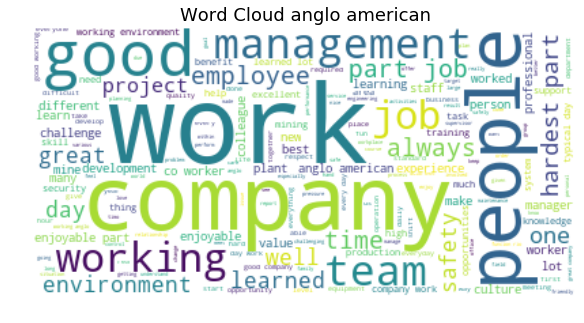

In [211]:
# Plotting the word cloud for anglo american

text = anglo_american["description"]
text = " ".join(t for t in text) 
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.title("Word Cloud anglo american", size = 18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [212]:
# Lemmatization -> converting the word into root word
st = PorterStemmer()
anglo_american["description"] = (anglo_american["description"].
                                 apply(lambda x: " ".
                                       join([Word(word).
                                             lemmatize() for word in x.split()])))

In [213]:
# Extracting year wise data

anglo_american_2018 = anglo_american[anglo_american.date == "2018"]
anglo_american_2017 = anglo_american[anglo_american.date == "2017"]
anglo_american_2016 = anglo_american[anglo_american.date == "2016"]
anglo_american_2015 = anglo_american[anglo_american.date == "2015"]
anglo_american_2014 = anglo_american[anglo_american.date == "2014"]
anglo_american_2013 = anglo_american[anglo_american.date == "2013"]
anglo_american_2012 = anglo_american[anglo_american.date == "2012"]

## 3. Sentiment Analysis

Below code is used to do the sentiment analysis on each review. Sentiment is analysed for each review ranging from -1 to 1, where a negative number represents a negative sentiment and a positive number represents positive sentiment.

In [215]:
# Performing sentiment analysis

analyser = SentimentIntensityAnalyzer()

anglo_american_2012["Sentiments"] = (anglo_american_2012.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
anglo_american_2013["Sentiments"] = (anglo_american_2013.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
anglo_american_2014["Sentiments"] = (anglo_american_2014.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
anglo_american_2015["Sentiments"] = (anglo_american_2015.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
anglo_american_2016["Sentiments"] = (anglo_american_2016.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
anglo_american_2017["Sentiments"] = (anglo_american_2017.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
anglo_american_2018["Sentiments"] = (anglo_american_2018.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))

C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [221]:
# Sentiment analysis location wise


# unique location in the data
unique_location = anglo_american["job location"].unique()


# List to contain location wise dataframes
# each list of this element is a dataframe
# based on specific location
# Number of unique locations is 16
loc_wise_df = []



# Function to extract locationwise data
# Input: Dataframe and location name
# Output: Dataframe based on given location
def loc_data(df, l):
    
    data = df[df["job location"] == l]
    return data



# Loop to seperate dataframe based on location
# List contain 16 dataframes based on location
for l in unique_location:
    
    if l == "":
        continue
        
    data = loc_data(anglo_american, l)
    loc_wise_df.append(data)


    
# Sentiment analysis on dataframe location wise
for x in loc_wise_df:
    
    x["Sentiments"] = (x.description.apply(lambda x: analyser.polarity_scores(x)))

C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [224]:
# Tokenizing data
# Converts data into tokens
# Necessary step before doing topic modelling

anglo_american["description"] = (anglo_american["description"].
                                 apply(lambda x: TextBlob(x).words))
anglo_american.description[:10]

0    [enjoyed, working, multinational, exploration,...
1    [assisting, handling, user, call, setup, maint...
2    [excellent, company, work, sal, rio, good, ben...
3    [great, place, work, installation, timos, enjo...
4    [anglo, american, note, 10, security, care, pe...
5    [company, upholds, constitution, form, discrim...
6    [secretary, dealt, plant, head, department, go...
7    [company, constant, preparation, line, supervi...
8    [much, work, done, working, plant, training, c...
9    [employee, work, task, employee, responsibilit...
Name: description, dtype: object

In [225]:
# Creating corpus

dictionary = corpora.Dictionary(anglo_american.description)
corpus = [dictionary.doc2bow(text) for text in anglo_american.description]

## 4. Topic Modelling

Below code does topic modelling. Topic is a repeating pattern of co-occuring words. They can help in organizing the reviews by the topics they give information about. I have chosen number of topics as 5, but this can be changed.

In [226]:
# Topic modelling with 5 topics
# Note: I have used 5 topics and 4 words
#       per topics for topic modelling, i.e.,
#       each topic is defined by 4 words and
#       there are a total of 5 topics, these
#       parameters can be changed.



NUM_TOPICS = 5
ldamodel = (gensim.models.ldamodel.
            LdaModel(corpus, num_topics = NUM_TOPICS, 
                     id2word=dictionary, passes=15))
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.025*"company" + 0.014*"good" + 0.012*"working" + 0.010*"environment"')
(1, '0.027*"work" + 0.020*"job" + 0.018*"part" + 0.015*"company"')
(2, '0.009*"company" + 0.009*"good" + 0.008*"working" + 0.004*"time"')
(3, '0.019*"work" + 0.018*"company" + 0.014*"good" + 0.009*"great"')
(4, '0.033*"work" + 0.022*"company" + 0.019*"day" + 0.014*"good"')


# rio-tinto

## 1. Cleaning the data

In [228]:
# Cleaning the columns job location and description
rio_tinto["job location"] = rio_tinto["job location"].apply(remove_special_chars)
rio_tinto["description"] = rio_tinto["description"].apply(remove_special_chars)

In [229]:
# Extracting the year from the date column

rio_tinto["date"] = rio_tinto["date"].apply(lambda x: x[-4:])

In [230]:
# Preprocessing the text data

# Making all the words in lower case in location
# and description column
rio_tinto["description"] = (rio_tinto["description"].
                                 apply(lambda x: " ".join(x.lower() for x in x.split())))
rio_tinto["job location"] = (rio_tinto["job location"].
                                 apply(lambda x: " ".join(x.lower() for x in x.split())))

# Removing punctuation
rio_tinto["description"] = rio_tinto["description"].str.replace('[^\w\s]','')
rio_tinto["job location"] = rio_tinto["job location"].str.replace('[^\w\s]','')

# Removing stop words
stop = stopwords.words('english')
rio_tinto["description"] = (rio_tinto["description"].
                                 apply(lambda x: " ".
                                       join(x for x in x.split() if x not in stop)))


## 2. Word Cloud

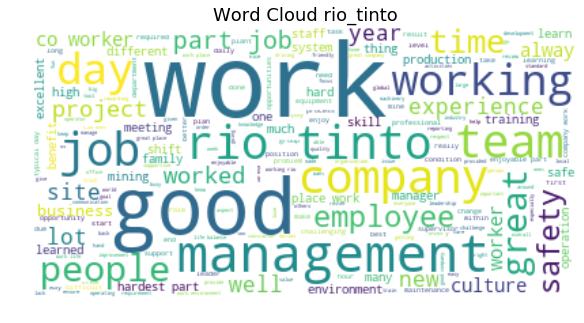

In [231]:
# Plotting the word cloud for rio tinto

text = rio_tinto["description"]
text = " ".join(t for t in text) 
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.title("Word Cloud rio_tinto", size = 18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [232]:
# Extracting year from the date column

rio_tinto["date"] = rio_tinto["date"].apply(lambda x: x[-4:])
rio_years = rio_tinto.date.unique()
rio_years

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'],
      dtype=object)

In [233]:
# Lemmatization -> converting the word into root word
st = PorterStemmer()
rio_tinto["description"] = (rio_tinto["description"].
                                 apply(lambda x: " ".
                                       join([Word(word).
                                             lemmatize() for word in x.split()])))

In [234]:
# Extracting year wise data

rio_tinto_2018 = rio_tinto[anglo_american.date == "2018"]
rio_tinto_2017 = rio_tinto[anglo_american.date == "2017"]
rio_tinto_2016 = rio_tinto[anglo_american.date == "2016"]
rio_tinto_2015 = rio_tinto[anglo_american.date == "2015"]
rio_tinto_2014 = rio_tinto[anglo_american.date == "2014"]
rio_tinto_2013 = rio_tinto[anglo_american.date == "2013"]
rio_tinto_2012 = rio_tinto[anglo_american.date == "2012"]
rio_tinto_2011 = rio_tinto[anglo_american.date == "2011"]

C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed 

## 3. Sentiment Analysis

In [235]:
# Performing sentiment analysis

analyser = SentimentIntensityAnalyzer()

rio_tinto_2011["Sentiments"] = (rio_tinto_2011.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
rio_tinto_2012["Sentiments"] = (rio_tinto_2012.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
rio_tinto_2013["Sentiments"] = (rio_tinto_2013.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
rio_tinto_2014["Sentiments"] = (rio_tinto_2014.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
rio_tinto_2015["Sentiments"] = (rio_tinto_2015.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
rio_tinto_2016["Sentiments"] = (rio_tinto_2016.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
rio_tinto_2017["Sentiments"] = (rio_tinto_2017.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
rio_tinto_2018["Sentiments"] = (rio_tinto_2018.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))

C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

In [237]:
# Tokenizing data

rio_tinto["description"] = (rio_tinto["description"].
                                 apply(lambda x: TextBlob(x).words))
rio_tinto.description[:10]

0    [good, place, work, salary, perk, goodleadersh...
1    [international, workplace, colleague, manager,...
2    [request, availability, large, quantity, orien...
3    [depending, rio, tinto, great, terrible, role,...
4    [work, environment, good, staff, member, excel...
5    [company, constant, state, flux, people, know,...
6    [excellent, company, work, encourage, professi...
7    [great, company, work, never, dull, moment, ri...
8    [global, company, difficult, challenging, work...
9    [strength, financial, stability, innovative, r...
Name: description, dtype: object

In [238]:
# Creating corpus

dictionary = corpora.Dictionary(rio_tinto.description)
corpus = [dictionary.doc2bow(text) for text in rio_tinto.description]

## 4. Topic Modelling

In [239]:
# Topic modelling with 5 topics

NUM_TOPICS = 5
ldamodel = (gensim.models.ldamodel.
            LdaModel(corpus, num_topics = NUM_TOPICS, 
                     id2word=dictionary, passes=15))
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.027*"work" + 0.018*"rio" + 0.016*"tinto" + 0.014*"working"')
(1, '0.023*"work" + 0.018*"job" + 0.014*"day" + 0.011*"company"')
(2, '0.027*"work" + 0.014*"good" + 0.013*"place" + 0.011*"management"')
(3, '0.017*"work" + 0.008*"good" + 0.008*"safety" + 0.007*"working"')
(4, '0.022*"work" + 0.013*"good" + 0.012*"part" + 0.011*"job"')


# glencore

## 1. Cleaning the data

In [240]:
# Cleaning the columns job location and description
glencore["job location"] = glencore["job location"].apply(remove_special_chars)
glencore["description"] = glencore["description"].apply(remove_special_chars)

In [241]:
# Extracting the year from the date column

glencore["date"] = glencore["date"].apply(lambda x: x[-4:])

In [242]:
# Preprocessing the text data

# Making all the words in lower case in location
# and description column
glencore["description"] = (glencore["description"].
                                 apply(lambda x: " ".join(x.lower() for x in x.split())))
glencore["job location"] = (glencore["job location"].
                                 apply(lambda x: " ".join(x.lower() for x in x.split())))

# Removing punctuation
glencore["description"] = glencore["description"].str.replace('[^\w\s]','')
glencore["job location"] = glencore["job location"].str.replace('[^\w\s]','')

# Removing stop words
stop = stopwords.words('english')
glencore["description"] = (glencore["description"].
                                 apply(lambda x: " ".
                                       join(x for x in x.split() if x not in stop)))


## 2. Word Cloud

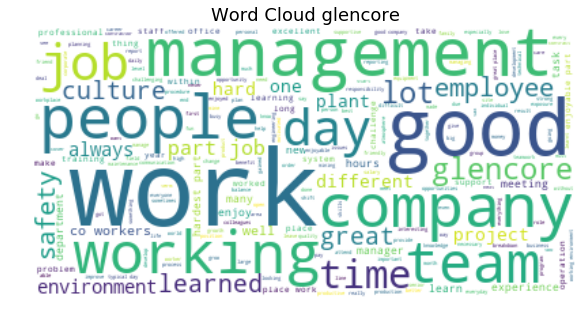

In [243]:
# Plotting the word cloud for glencore

text = glencore["description"]
text = " ".join(t for t in text) 
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.title("Word Cloud glencore", size = 18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [244]:
# Extracting year from the date column

glencore["date"] = glencore["date"].apply(lambda x: x[-4:])
glencore_years = glencore.date.unique()
glencore_years

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012'],
      dtype=object)

In [245]:
# Lemmatization -> converting the word into root word
st = PorterStemmer()
glencore["description"] = (glencore["description"].
                                 apply(lambda x: " ".
                                       join([Word(word).
                                             lemmatize() for word in x.split()])))

In [246]:
# Extracting year wise data

glencore_2018 = glencore[anglo_american.date == "2018"]
glencore_2017 = glencore[anglo_american.date == "2017"]
glencore_2016 = glencore[anglo_american.date == "2016"]
glencore_2015 = glencore[anglo_american.date == "2015"]
glencore_2014 = glencore[anglo_american.date == "2014"]
glencore_2013 = glencore[anglo_american.date == "2013"]
glencore_2012 = glencore[anglo_american.date == "2012"]

C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed 

## 3. Sentiment Analysis

In [247]:
# Performing sentiment analysis

analyser = SentimentIntensityAnalyzer()

glencore_2012["Sentiments"] = (glencore_2012.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
glencore_2013["Sentiments"] = (glencore_2013.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
glencore_2014["Sentiments"] = (glencore_2014.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
glencore_2015["Sentiments"] = (glencore_2015.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
glencore_2016["Sentiments"] = (glencore_2016.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
glencore_2017["Sentiments"] = (glencore_2017.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))
glencore_2018["Sentiments"] = (glencore_2018.
                                     description.
                                     apply(lambda x: analyser.polarity_scores(x)))

C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\amanlp7\Miniconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [248]:
# Tokenizing data

glencore["description"] = (glencore["description"].
                                 apply(lambda x: TextBlob(x).words))
glencore.description[:10]

0    [devising, new, sale, product, e, chr, commodi...
1    [high, staff, turnover, currently, far, fewer,...
2    [meet, flat, hierarchy, lot, leeway, make, dec...
3    [typical, day, start, 06h00, first, going, pro...
4    [glencore, successful, physical, commodity, tr...
5    [good, hse, well, paid, good, fellowship, good...
6    [wonderful, place, work, safety, standard, hig...
7    [ethic, fair, day, work, fair, day, pay, follo...
8    [working, condition, overall, culture, unpleas...
9    [glencore, firm, believer, casualisation, work...
Name: description, dtype: object

In [249]:
# Creating corpus

dictionary = corpora.Dictionary(glencore.description)
corpus = [dictionary.doc2bow(text) for text in glencore.description]

## 4. Topic Modelling

In [250]:
# Topic modelling with 5 topics

NUM_TOPICS = 5
ldamodel = (gensim.models.ldamodel.
            LdaModel(corpus, num_topics = NUM_TOPICS, 
                     id2word=dictionary, passes=15))
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.019*"work" + 0.014*"management" + 0.013*"company" + 0.013*"good"')
(1, '0.021*"work" + 0.011*"working" + 0.010*"project" + 0.010*"job"')
(2, '0.022*"work" + 0.018*"job" + 0.017*"part" + 0.015*"co"')
(3, '0.027*"work" + 0.011*"day" + 0.010*"people" + 0.008*"time"')
(4, '0.033*"work" + 0.027*"good" + 0.019*"company" + 0.011*"lot"')
